In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [10]:
df2=df.drop(['area_type','availability','balcony','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df2.shape

(13320, 5)

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

In [1]:
13246/13320

0.9944444444444445

In [2]:
13320-13246


74

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))#
df3.head()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2876\3390024418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))#


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
#filter out all such data
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3['total_sqft'].apply(is_float)].sample(5)

,location,size,total_sqft,bath,price,bhk
3285,Whitefield,4 Bedroom,500Sq. Yards,4.0,378.000,4
11407,Whitefield,3 BHK,1520 - 1759,3.0,92.630,3
9164,Jakkur,2 BHK,1230 - 1290,2.0,71.195,2
3984,Uttarahalli,3 BHK,1125 - 1500,3.0,51.190,3
8312,Tumkur Road,1 BHK,596 - 861,1.0,31.315,1


In [24]:
(2100+2850)/2

2475.0

In [25]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
convert_sqft_to_num('1526')

1526.0

In [27]:
print(convert_sqft_to_num('167Sq.Meter'))

None


In [28]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [29]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [30]:
df4.head(30)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [31]:
df5=df4.copy()

In [32]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
len(df5.location.unique())

1304

In [34]:
df5.location=df5.location.apply(lambda x:x.strip())
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [36]:
location_stats.head(40)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Hosa Road                    72

In [37]:
len(location_stats[location_stats<=10])

1052

In [38]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [39]:
len(df5.location.unique())

1293

In [40]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [41]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [42]:
#check for outliers
df5[df5['total_sqft']/df5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [43]:
df5.shape

(13246, 7)

In [44]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [45]:
df6.shape

(12502, 7)

In [46]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

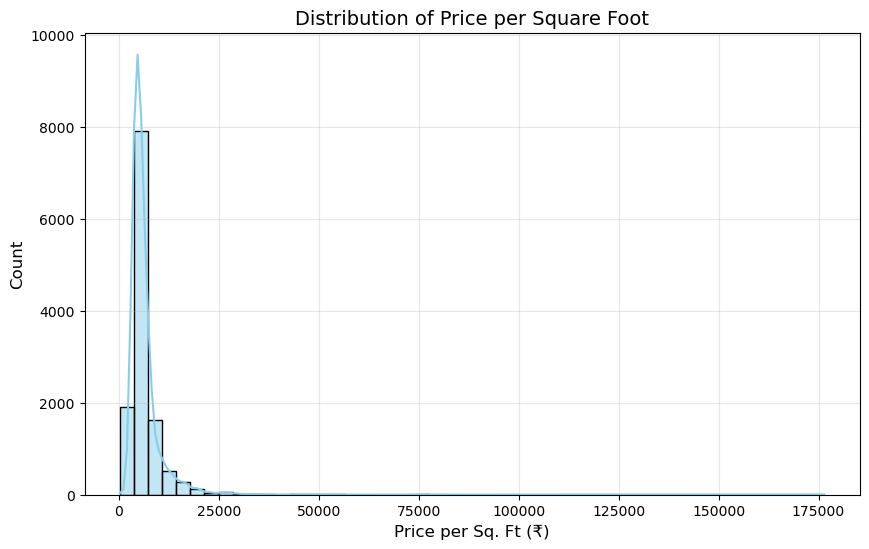

In [47]:
# Set figure size and style
plt.figure(figsize=(10, 6))
sns.histplot(df6['price_per_sqft'], bins=50, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Price per Square Foot', fontsize=14)
plt.xlabel('Price per Sq. Ft (₹)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

In [48]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [49]:
df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [50]:
10241/12502

0.8191489361702128

In [51]:
import matplotlib

In [52]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('total_sqft_area')
    plt.ylabel('price_per_sqft')
    plt.title(location)
   
    plt.show()

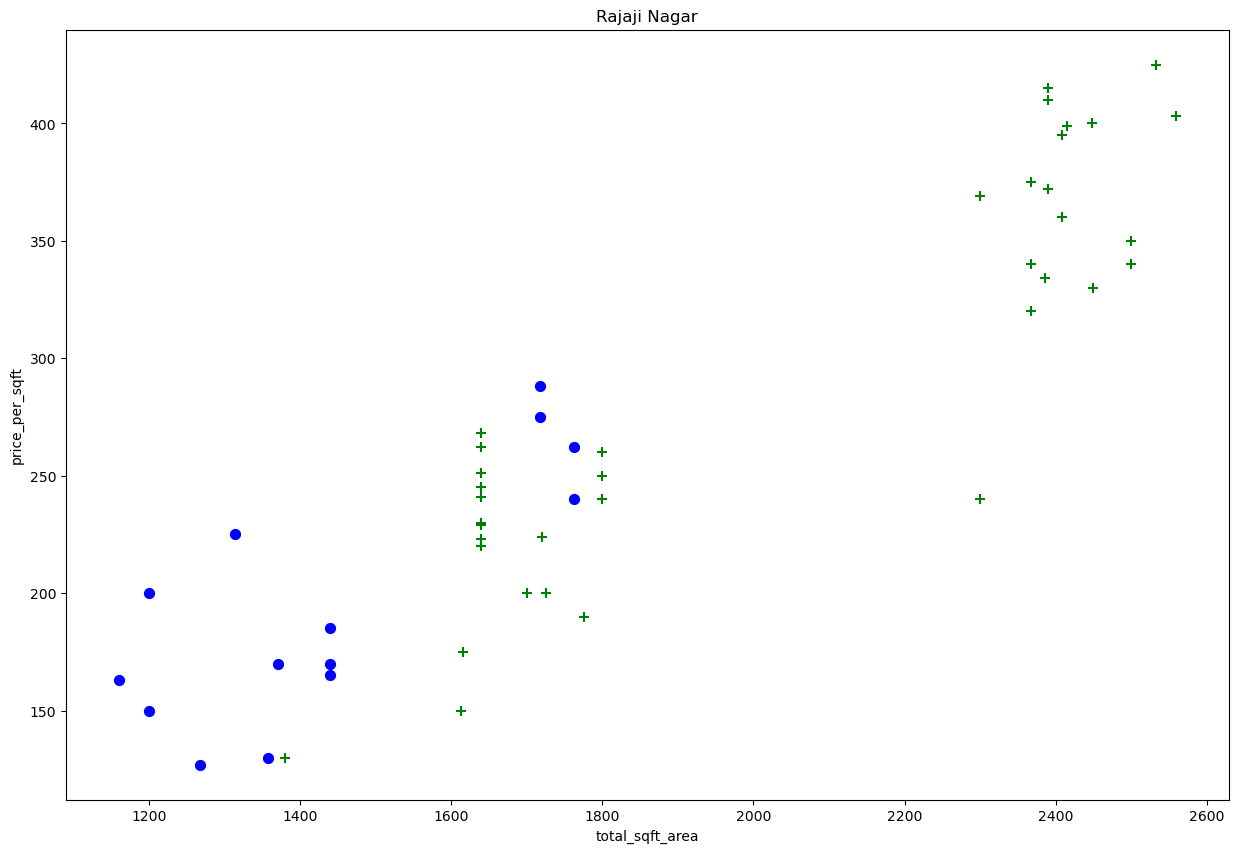

In [53]:
plot_scatter_chart(df7,'Rajaji Nagar')

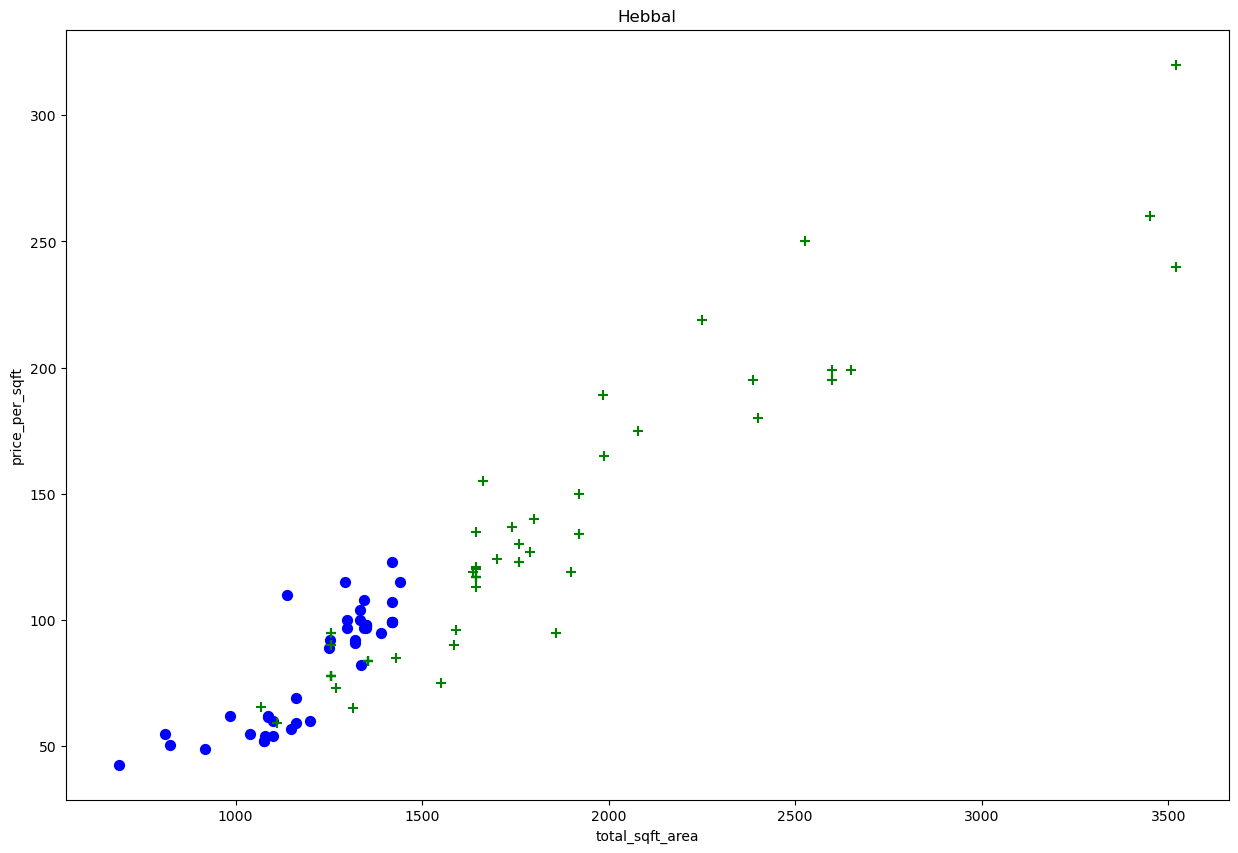

In [54]:
plot_scatter_chart(df7,'Hebbal')

In [55]:
def remove_bhk_outliers(df):
    #this list will store the index numbers of all the rows that are cosidered as outliers and should be removed
    exclude_indices = np.array([])
    #df.groupby('location') splits ur dataset into subsets where all the rows have the same location
    #location_df  a mini df that contains rows only from that location
    for location, location_df in df.groupby('location'):
        bhk_stats = {}#creates an empty dict to store summary stats(mean,std,count) of pps of each BHKlevel within this location
        for bhk, bhk_df in location_df.groupby('bhk'):#for current location it groups the data by bhk
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),#for each bhk it computes mean std count#avg pps for that bhk
                'std': np.std(bhk_df.price_per_sqft),#std (spread) of those prices
                'count': bhk_df.shape[0]#how manny datapoints exist (bhk_df.shape[0]=num of rows)
            }
        for bhk, bhk_df in location_df.groupby('bhk'):#runs through bhk groups agian,this time we use stats that we calculated to find outliers
            stats = bhk_stats.get(bhk-1)#gets stats for one smaller bhk#(for 3bhk it looks up stats of 2bhk
            #if a 3bhk flat is cheaper per sqft than the avg 2bhk,it can be suspicious and likely outlier or a dataentry error
            if stats and stats['count']>5:#there are enough samples(atleast 5) to make a reliable comparison#only then we consider removing outliers for this bhk level
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    #finds all rows in the current bhk_df where pps is < mean pps of the smaller bhk(bhk-1)
    #those are likely outliers  since larger apartements may have equal or higher per sqft prices
    #their index values are added to exclude _indices
    return df.drop(exclude_indices,axis='index')
    #after looping through all bhk levels and locations
    #drops all rows whose indices are listed in exclude_indices
    #returns a cleaned dataframe without outliers

In [56]:
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

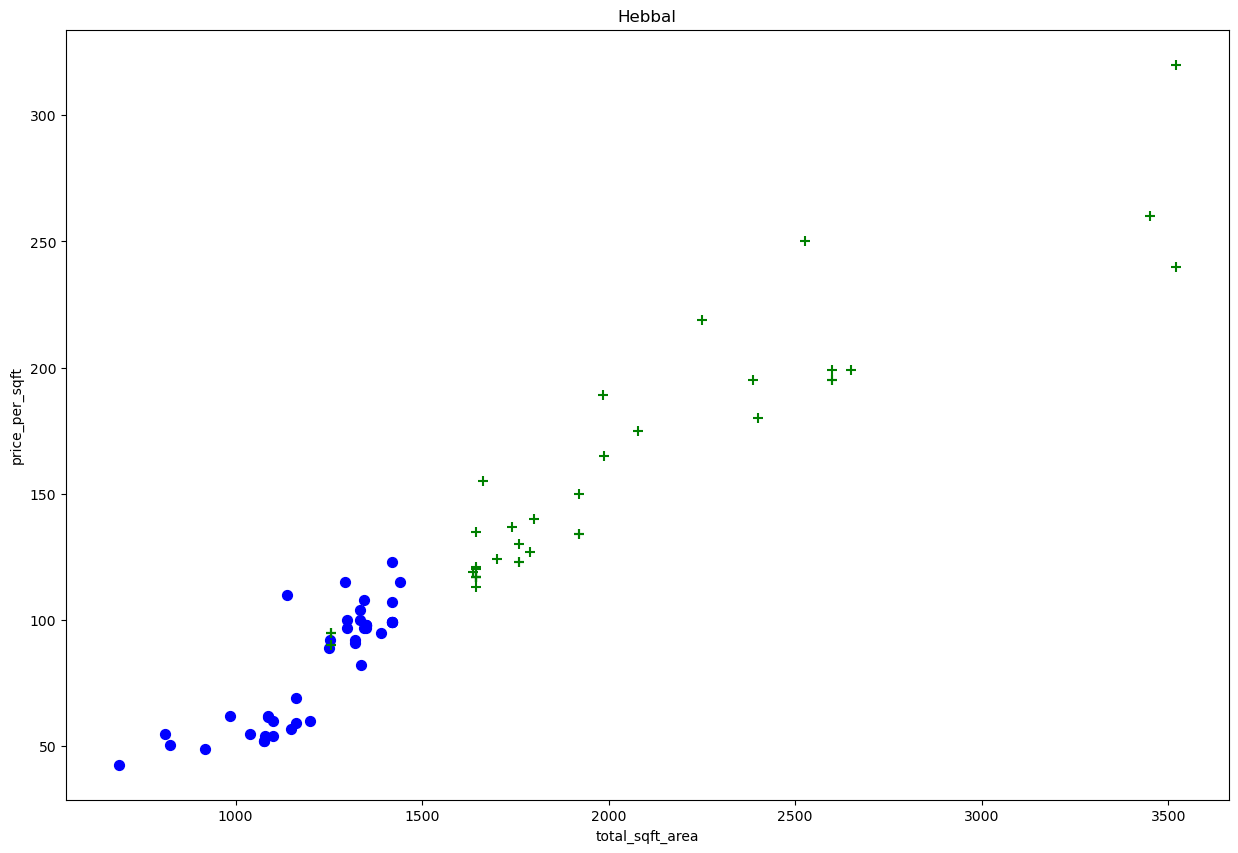

In [57]:
plot_scatter_chart(df8,'Hebbal')

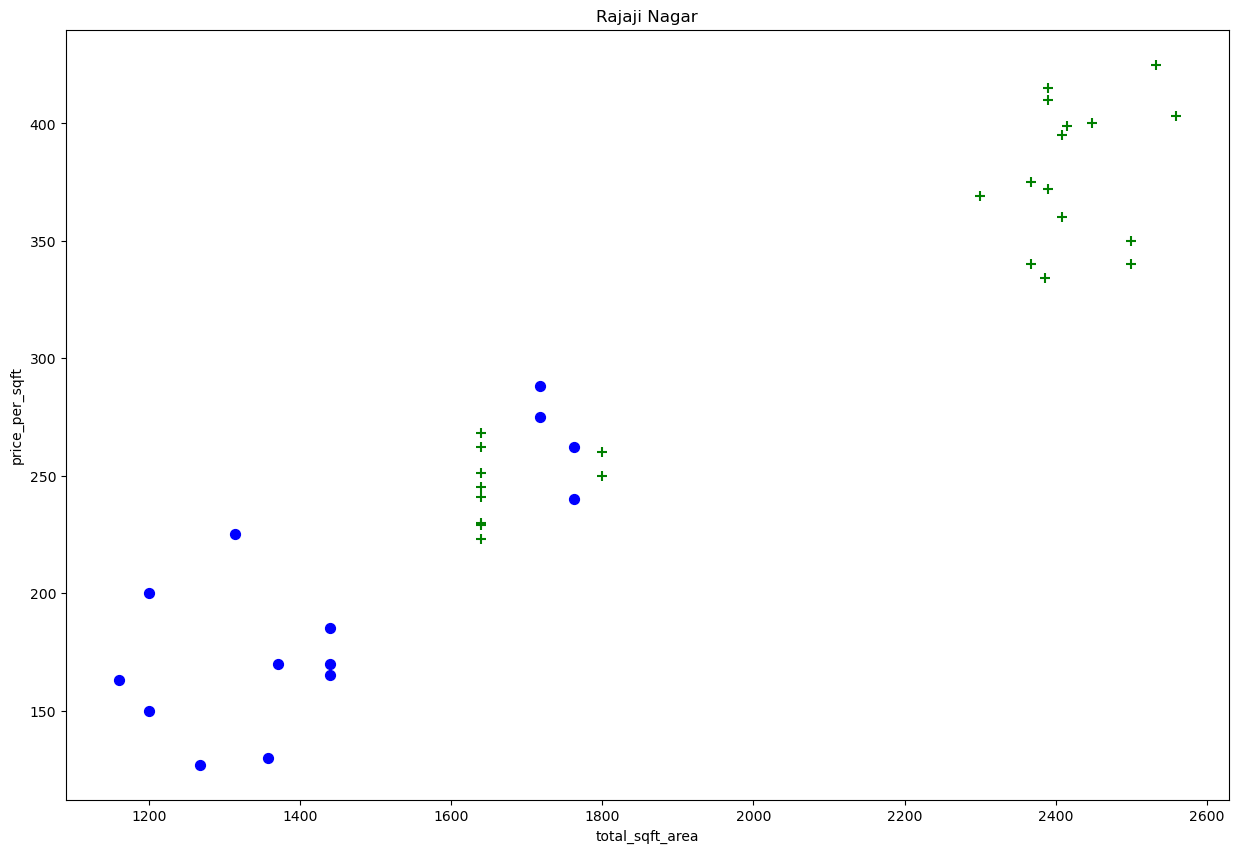

In [58]:
plot_scatter_chart(df8,'Rajaji Nagar')

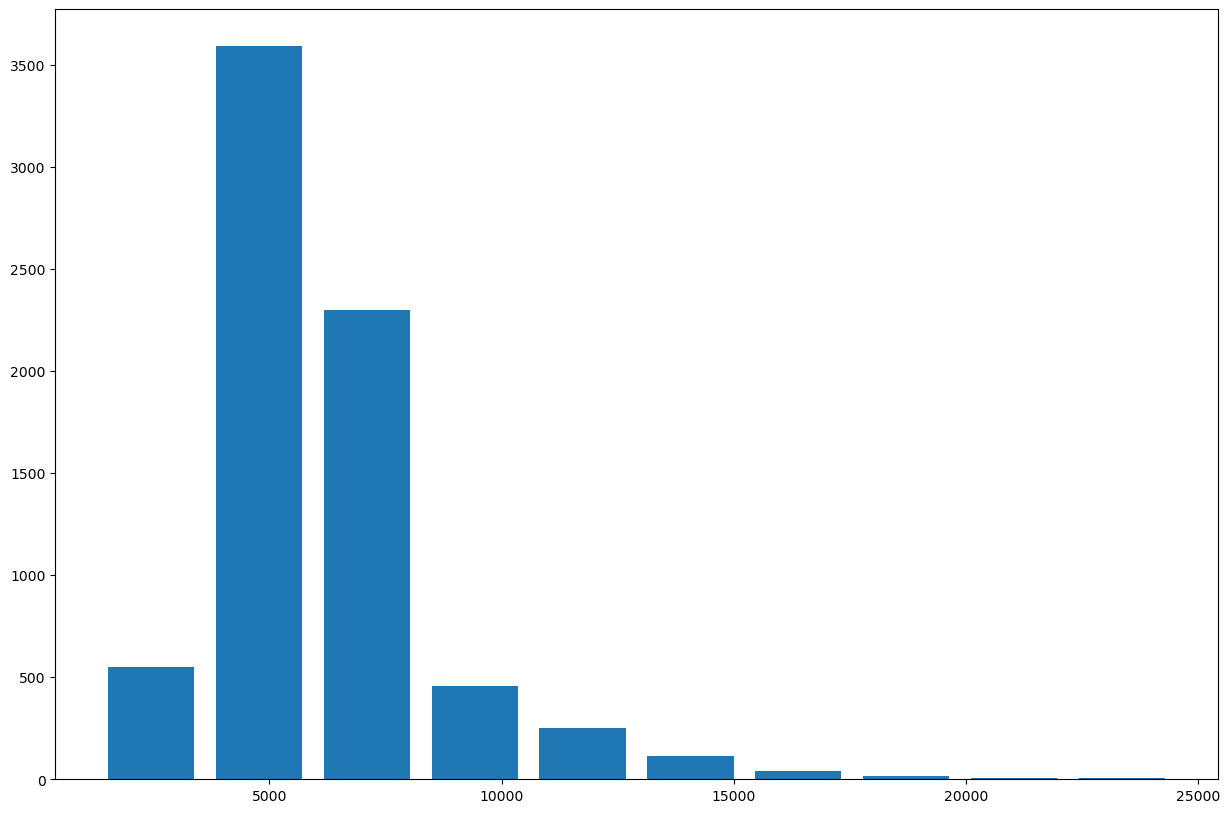

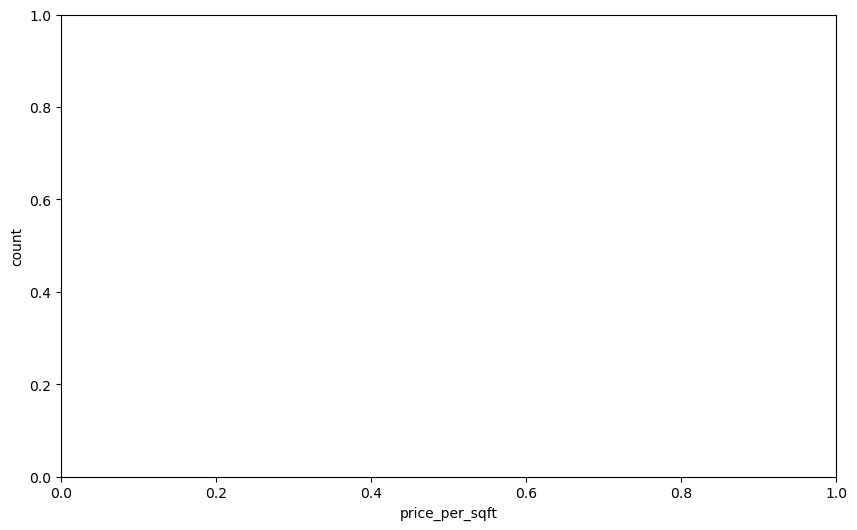

In [59]:
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.figure(figsize=(10,6))
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

In [60]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [61]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


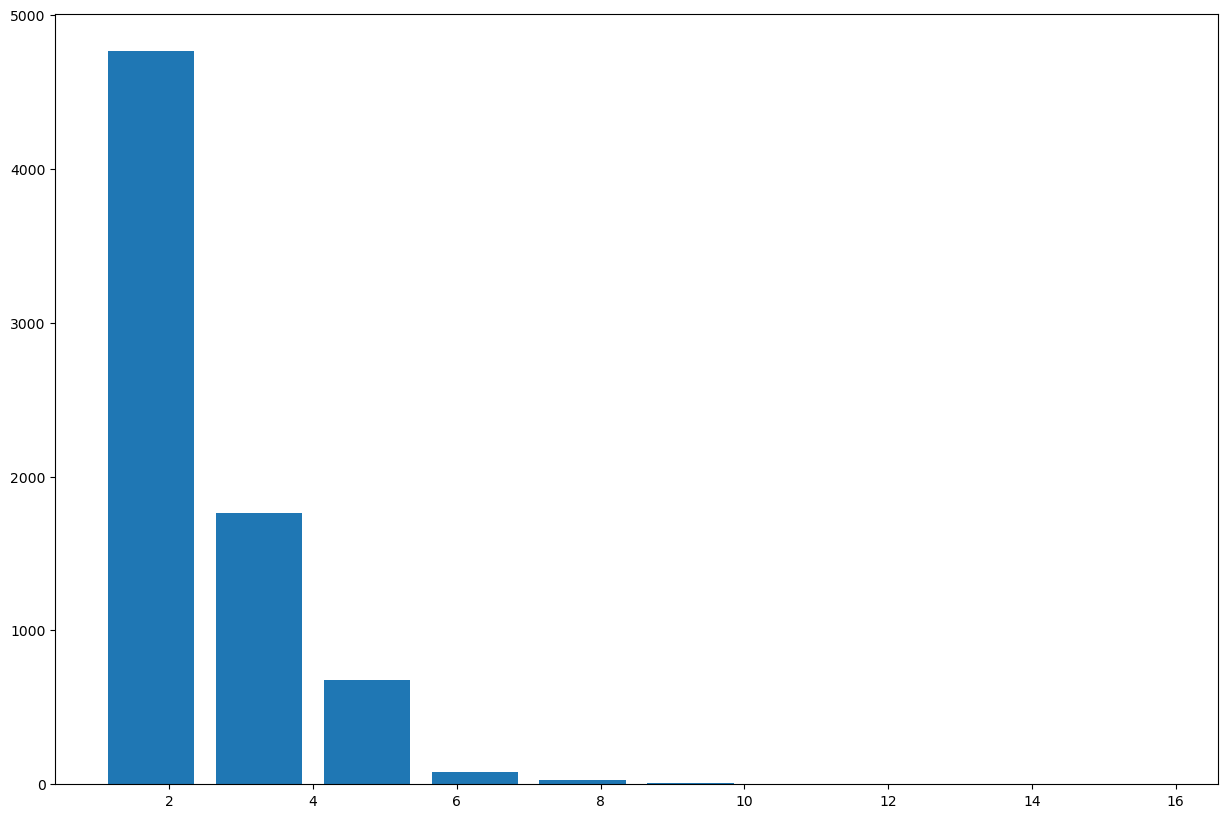

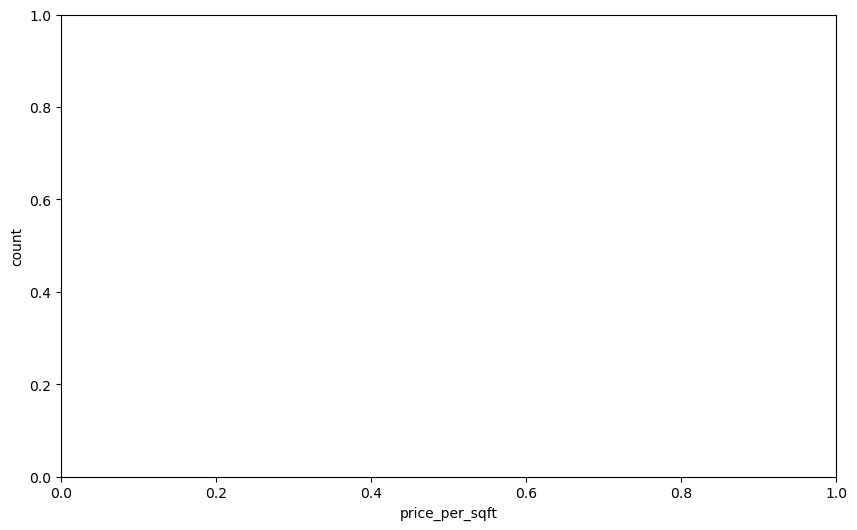

In [63]:
plt.hist(df8['bath'],rwidth=0.8)
plt.figure(figsize=(10,6))
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

In [64]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [65]:
df9=df8[df8.bath<df8.bhk+2]

In [66]:
df9.shape

(7251, 7)

In [67]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.shape

(7251, 5)

In [68]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [69]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 10240
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7251 non-null   object 
 1   total_sqft  7251 non-null   float64
 2   bath        7251 non-null   float64
 3   price       7251 non-null   float64
 4   bhk         7251 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 339.9+ KB


In [69]:
df10.to_csv('bhp.csv', index=False)
print("✅ DataFrame saved as 'bhp.csv'")

✅ DataFrame saved as 'bhp.csv'


In [70]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
dummies.sample(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
6464,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7881,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6230,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9356,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [72]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.shape

(7251, 246)

In [73]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874312

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_GridSearchCV(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]     
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_GridSearchCV(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive', 'tol'].

In [80]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_GridSearchCV(X, y):
    algos = {                 #creates a dict that stores each model and the parameters we want to tune
        'linear_regression': {     #linear regression section
            'model': LinearRegression(), #specifies the model class
            'params': {       #hyperparameters to test using gridsearch cv
                'fit_intercept': [True, False] #try the model with and without intercept
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2], #regularization strength to try
                'selection': ['random', 'cyclic'] #algorithm used to update coefficients
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'squared_error'],  #how decision tree splits
                'splitter': ['best', 'random'] #whether the best split or random split 
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():   #algo_name--->model name(string), config----->contains model object and its parameters
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
                              # (config['model']  the model(LR,Lasso,DT)
                              #config['params']-->hyperparameter grid for that model
        gs.fit(X, y)    #trains the model using all combinations of parameters and cross validation              
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [94]:
find_best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687502,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718941,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [82]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [83]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [84]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677179237

In [ ]:
1st Block Jayanagar	2850.0	4.0	428.0	4

In [97]:
predict_price('Thanisandra',1265,3,3)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.50084411683054

In [95]:
df6.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10096,other,2 Bedroom,1400.0,2.0,160.0,2,11428.571429
10291,Mico Layout,2 BHK,1200.0,2.0,53.5,2,4458.333333
12539,Frazer Town,4 BHK,4100.0,4.0,660.0,4,16097.560976
10654,other,2 BHK,827.0,2.0,34.0,2,4111.245466
11040,Thanisandra,2 BHK,1185.0,2.0,45.0,2,3797.468354


In [98]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)
    